(PROGLINEAL)=

# 4.2 Programación lineal

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

```{sidebar} Un poco de historia ...

El desarrollo de la programación lineal (PL) ha sido clasificado como uno de los avances científicos más importantes de mediados del siglo XX. Es quizás el modelo prototipo de la optimización con restricciones. El efecto que ha tenido en la práctica y en áreas del conocimiento desde 1950 es en verdad grande. El tipo más común de aplicación abarca el problema general de asignar de la mejor manera posible, esto es, de forma óptima, recursos limitados a actividades que compiten entre sí por ellos. Con más precisión, se desea elegir el nivel de ciertas actividades que compiten por recursos escasos necesarios para realizarlas y se puedan asignar recursos a tales actividades. El desarrollo por Dantzig del método símplex para resolver programas lineales en los $40$'s marcó el inicio de la era moderna en optimización. 

La PL utiliza un modelo matemático para describir el problema. El adjetivo lineal significa que todas las funciones matemáticas del modelo deben ser funciones lineales. En este caso, la palabra programación no se refiere a términos computacionales; en esencia es sinónimo de planeación. Por lo tanto, la PL involucra la planeación de actividades para obtener un resultado óptimo; esto es, el resultado que mejor alcance la meta establecida, de acuerdo con el modelo matemático, entre todas las alternativas factibles.

Aunque la asignación de recursos a las actividades es la aplicación más frecuente en PL, cualquier problema cuyo  modelo matemático se ajuste al formato general del modelo de PL, es un problema de PL.

```

Un programa lineal **en su forma estándar** es un problema de optimización con una función lineal objetivo, un conjunto de restricciones lineales y un conjunto de restricciones no negativas impuestas a las variables. Es un **modelo de optimización** de la forma:

$$\min c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

donde: $A \in \mathbb{R}^{m \times n}$ y se **asume** $m \leq n$ y tiene *rank* completo por renglones y la última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero.

## Ejemplo: flujo en redes

Considérese el problema de satisfacer la demanda de todos los nodos con etiquetas "A, B, C, D" y "E" de la siguiente red de acuerdo a las capacidades de cada uno de ellos al menor costo posible:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

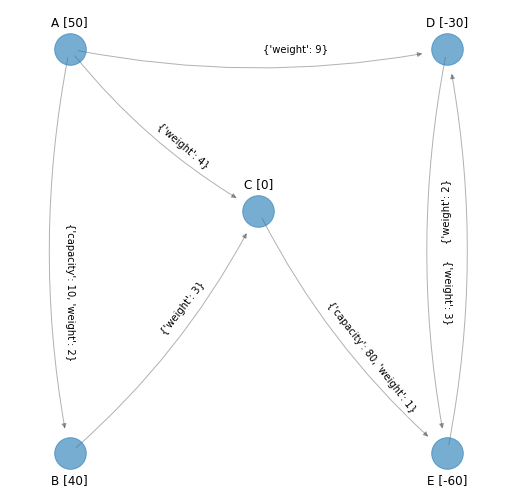

In [2]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', demand = 50, node_and_demand="A [50]")
G_min_cost_flow.add_node('B', demand = 40, node_and_demand="B [40]")
G_min_cost_flow.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow.add_node('D', demand = -30, node_and_demand="D [-30]")
G_min_cost_flow.add_node('E', demand = -60, node_and_demand="E [-60]")

edge_labels_min_cost_flow = {('A', 'B'): {"capacity": 10,
                            "weight": 2},
                             ('A', 'C'): {"weight": 4},
                             ('A', 'D'): {"weight": 9},
                             ('B', 'C'): {"weight": 3},
                             ('C', 'E'): {"capacity": 80,
                                          "weight": 1},
                             ('E', 'D'): {"weight": 2},
                             ('D', 'E'): {"weight": 3}
                            }


G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
    if e == ('A', 'B') or e == ('C', 'E'):
        G_min_cost_flow[e[0]][e[1]]["capacity"] = edge_labels_min_cost_flow[e]["capacity"]
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
    else:
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
        
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             edge_labels=edge_labels_min_cost_flow, label_pos=0.4,
                             font_size=10)
nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
labels = nx.get_node_attributes(G_min_cost_flow, "node_and_demand")

nx.draw_networkx_labels(G_min_cost_flow, pos=nodes_and_pos_modified, 
                        labels=labels)
nx.draw_networkx_nodes(G_min_cost_flow, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

```{margin}

Obsérvese que es ligeramente distinta la nomenclatura de este problema en cuanto a los términos de flujo neto y demanda que tiene un nodo de acuerdo a lo que se describió en el {ref}`ejemplo de flujo de costo mínimo <EJREDFLUJOCOSTOMIN>`

```

Al lado de cada nodo en corchetes se presenta el flujo neto generado por el nodo. Los nodos origen tienen un flujo neto positivo y en la red son los nodos "A" y "B" (por ejemplo fábricas). Los nodos destino tienen un flujo neto negativo que en la red son los nodos "D" y "E" (por ejemplo clientes). El único nodo de transbordo es el nodo "C" que tiene flujo neto igual a cero (centro de distribución por ejemplo). Los valores de los costos se muestran en los arcos. Únicamente se tienen capacidades en los arcos $(A, B)$ igual a $10$ y el arco $(C, E)$ igual a $80$.

Entonces el modelo de programación lineal considerando que el **flujo neto** de un nodo es igual al flujo total que sale del nodo menos el flujo total que entra al nodo es:

$$\displaystyle \min 2 x_{AB} + 4 x_{AC} + 9 x_{AD} + 3 x_{BC} + x_{CE} + 3 x_{DE} + 2x_{ED}$$

$$\text{sujeto a: }$$

$$
\begin{eqnarray}
&x_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 50 \nonumber \\
&-x_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 40 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

$$x_{ij} \geq 0 \forall i,j$$

$$x_{AB} \leq 10, x_{CE} \leq 80$$

La primer restricción de igualdad representa el flujo neto para el nodo $A$ y la última el flujo neto para el nodo $E$.

```{admonition} Observación
:class: tip

Obsérvese que la matriz que representa a las restricciones de igualdad es la matriz de incidencia nodo-arco.

```

```{margin}

Multiplicamos por $-1$ pues el resultado de la función `incidence_matrix` está volteado respecto a la definición de la matriz de incidencia nodo-arco. 
```

In [3]:
print(-1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense())

[[ 1.  1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1. -1.  1.]]


El problema anterior lo podemos resolver directamente con [scipy-optimize-linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy-optimize-linprog):

In [4]:
from scipy.optimize import linprog
import numpy as np

In [5]:
c = np.array([2, 4, 9, 3, 1, 3, 2])

A_eq = -1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense()

In [6]:
A_eq

matrix([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0., -1.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  1., -1.],
        [ 0.,  0.,  0.,  0., -1., -1.,  1.]])

In [7]:
b = list(nx.get_node_attributes(G_min_cost_flow, 
                             "demand").values())

In [8]:
bounds = [(0, 10), (0,None), (0,None), (0,None), (0,80), (0, None), (0, None)]

In [9]:
linprog(c=c, A_eq=A_eq, b_eq=b,bounds=bounds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


     con: array([ 1.90228356e-07,  1.61896459e-07,  4.04727984e-09, -1.17374949e-07,
       -2.38797142e-07])
     fun: 489.99999837231917
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([6.25611956e-08, 3.99999997e+01, 1.00000000e+01, 3.99999999e+01,
       7.99999996e+01, 1.51241040e-08, 1.99999999e+01])

También con `cvxpy` podemos resolver el PL anterior:

```{margin}

Ver [cvxpy: linear_program](https://www.cvxpy.org/examples/basic/linear_program.html)

```

In [10]:
import cvxpy as cp

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [11]:
n = 7 #number of variables
x = cp.Variable(n)
fo_cvxpy = c.T@x #objective function

constraints = [A_eq@x == b,
               x >=0,
               x[0] <= 10,
               x[4] <= 80
               ]

In [12]:
opt_objective = cp.Minimize(fo_cvxpy)

In [13]:
prob = cp.Problem(opt_objective, constraints)
print(prob.solve())

490.0000000072316


In [14]:
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)


The optimal value is 490.0000000072316
A solution x is
[4.98083642e-09 4.00000000e+01 1.00000000e+01 4.00000000e+01
 8.00000000e+01 3.58876853e-10 2.00000000e+01]


## Ejemplo: método gráfico

Supóngase que una compañía que tiene tres plantas en las que se producen dos productos. La compañía nos entrega los siguientes datos relacionados con:

1. Número de horas de producción disponibles por semana en cada planta para fabricar estos productos.

2. Número de horas de fabricación para producir cada lote de los productos.

3. La ganancia por lote de cada producto.

Lo anterior se resume en la siguiente tabla:

| |Tiempo de producción por lote en horas |||
|:---:|:---:|:---:|:---:|
| Planta |Producto 1|Producto 2| Tiempo de producción disponible a la semana en horas|
|1|1|0|4|
|2|0|2|12|
|3|3|2|18|
|Ganancia por lote| 3000| 5000||

Como se lee en la tabla, cada producto se fabrica en lotes de modo que la tasa de producción está definida como el número de lotes que se producen a la semana. Se permite cualquier combinación de tasas de producción que satisfaga estas restricciones, incluso no fabricar uno de los productos y elaborar todo lo que sea posible del otro. 

La tabla anterior indica por ejemplo en su primer renglón que cada lote del producto 1 que se produce por semana emplea una hora de producción en la planta 1 y sólo se dispone de 4 horas semanales. 

Se desea determinar cuáles tasas de producción (no negativas) deben tener los dos productos con el fin de maximizar las utilidades totales sujetas a las restricciones impuestas por las capacidades de producción limitadas disponibles en las tres plantas.

Se modela lo anterior como un problema de PL con las siguientes variables:

$x_1$: número de lotes del producto 1 que se fabrican por semana.

$x_2$: número de lotes del producto 2 que se fabrican por semana.

$f_o(x_1, x_2)$: ganancia semanal total (en miles de pesos) que generan estos dos productos.

El objetivo es elegir los valores de $x_1, x_2$ que maximicen $f_o$ sujeta a las restricciones impuestas sobre sus valores por las capacidades de producción limitadas de las cuales se disponen en las tres plantas. Esto es, resolver el PL siguiente:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

A continuación se muestra un procedimiento gráfico para resolver el PL anterior. Esto es posible realizar pues tenemos sólo dos variables. Se tomará $x_1$ como el eje horizontal y $x_2$ el eje vertical. Entonces se tiene la siguiente región definida por las desigualdades del PL:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

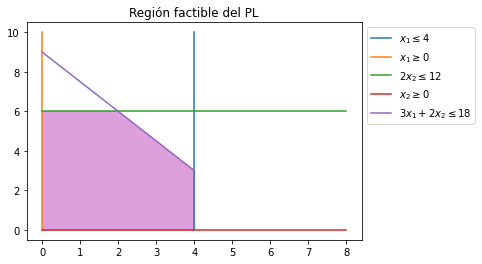

In [16]:
#x_1 ≤ 4

point1_x_1 = [4,0]

point2_x_1 = [4, 10]

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = [0,0]

point4_x_1 = [0, 10]

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = [0, 6]

point2_x_2 = [8, 6]

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = [0, 0]

point4_x_2 = [8, 0]

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x = np.linspace(0,4, 100)

x_2 = 1/2*(18 - 3*x)


plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x, x_2)

plt.legend(["$x_1 \leq 4$", "$x_1 \geq 0$", 
            "$2x_2 \leq 12$", "$x_2 \geq 0$",
            "$3x_1+2x_2 \leq 18$"], bbox_to_anchor=(1, 1))

plt.fill_between(x, 0, x_2, where=x_2<=6, color="plum")
x = np.linspace(0,2, 100)
plt.fill_between(x, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


La región sombreada es la región factible. Cualquier punto que se elija en la región factible satisface las desigualdades definidas en el PL. Ahora tenemos que seleccionar dentro de la región factible el punto que maximiza el valor de la función objetivo $f_o$.

El procedimiento gráfico consiste en dar a $f_o$ algún valor arbitrario, dibujar la recta definida por tal valor  y "mover tal recta de forma paralela" en la dirección que $f_o$ crece (si se desea maximizar y en la dirección en la que $f_o$ decrece si se desea minimizar) hasta que se mantenga en la región factible.

Para la función objetivo del PL anterior queda como sigue:

$$y = 3x_1 + 5x_2$$

y vamos dando valores arbitrarios a $y$:

```{margin}

Todas las rectas tienen la misma pendiente por lo que son paralelas.

```

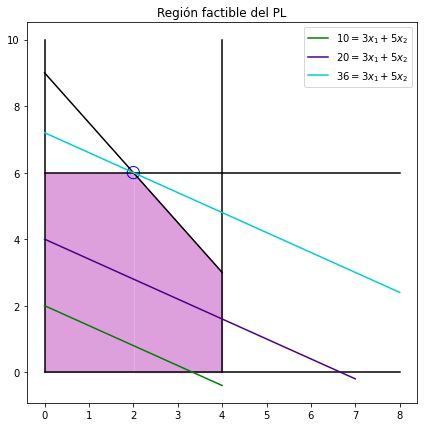

In [17]:
x = np.linspace(0,4, 100)

plt.figure(figsize=(7,7))
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], "black", label = "_nolegend_")
plt.plot(x, x_2, "black", label = "_nolegend_")

plt.fill_between(x, 0, x_2, where=x_2<=6, color="plum")
x = np.linspace(0,2, 100)
plt.fill_between(x, 0, 6, color="plum")
plt.title("Región factible del PL")

x_1_line_1 = np.linspace(0, 4, 100)

x_2_line_1 = 1/5*(-3*x_1_line_1 + 10)

x_1_line_2 = np.linspace(0, 7, 100)

x_2_line_2 = 1/5*(-3*x_1_line_2 + 20)

x_1_line_3 = np.linspace(0, 8, 100)

x_2_line_3 = 1/5*(-3*x_1_line_3 + 36)

plt.plot(x_1_line_1, x_2_line_1, "green",
         x_1_line_2, x_2_line_2, "indigo",
         x_1_line_3, x_2_line_3, "darkturquoise"
         )


plt.legend(["$10 = 3x_1 + 5x_2$",
            "$20 = 3x_1 + 5x_2$",
            "$36 = 3x_1 + 5x_2$"], bbox_to_anchor=(1, 1))

plt.scatter(2, 6, marker = 'o', s=150,
            facecolors='none', edgecolors='b')


plt.show()


Si realizamos este proceso para los valores de $y_1$ iguales a $36, 20, 10$ observamos que la recta que da el mayor valor de la $f_o$ y que se mantiene en la región factible es aquella con valor $y_1=36$. En la gráfica se marca el punto $(2, 6)$ que corresponden a los valores de $(x_1, x_2)$ que al sustituirlos en $f_o$ obtenemos tal valor.

```{admonition} Observación
:class: tip

El gradiente de la función objetivo nos indica la dirección de máximo crecimiento de $f_o$. En el ejemplo anterior obsérvese que $\nabla f_o(x) = \left [ \begin{array}{c} 3 \\ 5 \end{array} \right ]$ y tal vector apunta hacia la derecha y hacia arriba.

```

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

1. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.



